In [ ]:
# Rohitash Chandra, 2021 c.rohitash@gmail.conm
# https://github.com/sydney-machine-learning/multilayerperceptron-sgd-adam/blob/main/fnn-multiplelayers.py
# Source: https://github.com/sydney-machine-learning/multilayerperceptron-sgd-adam/blob/main/fnn-multiplelayers.py

import matplotlib.pyplot as plt
import numpy as np 
import random
import time
from numpy import *
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split


class Layers:
    
    def __init__(self, first, second, adam_learnrate=None):
        #self.number = first
        self.weights = np.random.uniform(-0.5, 0.5, (first, second))   
        self.bias = np.random.uniform(-0.5, 0.5, (1, second))  # bias second layer

        self.output = np.zeros(second)    # output of layer 
        self.gradient = np.zeros(second)  # gradient of layer
        
        
class Network:
    
    def __init__(self, topology, x_train, x_test, y_train, y_test, max_epocs, min_error, learn_rate):
        # this is called construtor
        self.topology = topology
        self.output_activationfunc = 'sigmoid'
        self.max_epocs = max_epocs    # max epocs
        #self.TrainData = Train
        #self.TestData = Test

        self.x_train = x_train
        self.x_test = x_test
        self.y_train = y_train
        self.y_test = y_test

        self.num_samples = x_train.shape[0] 

        self.sgdlearn_rate = learn_rate

        self.min_error = min_error 

        np.random.seed()   

        self.adam_learnrate = 0.05    # sensitive for adam

        self.end_index = len(self.topology) - 1

        self.layer = [None]*20  
        # create list of Layers objects (just max size of 20 for now - assuming a very deep neural network)

        print(self.topology, ' topology')

        self.layer[0] = Layers(1,1, 0)    # this is just for layer where input features are stored

        for n in range(1, len(self.topology)):
            self.layer[n] = Layers(self.topology[n-1], self.topology[n], self.adam_learnrate)

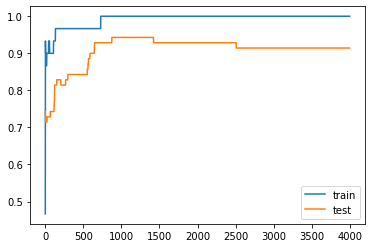

In [1]:
# Source: https://machinelearningmastery.com/how-to-reduce-overfitting-in-deep-learning-with-weight-regularization/
# overfit mlp for the moons dataset plotting history without regularisation

from sklearn.datasets import make_moons
from keras.layers import Dense
from keras.models import Sequential
from matplotlib import pyplot

# generate 2d classification dataset
X, y = make_moons(n_samples=100, noise=0.2, random_state=1)

# split into train and test
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=4000, verbose=0)

# plot history
# summarize history for accuracy
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.savefig('figures/normalnn.png')

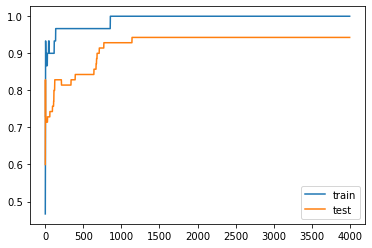

In [3]:
# source: https://machinelearningmastery.com/how-to-reduce-overfitting-in-deep-learning-with-weight-regularization/
# mlp with weight regularization (weight decay based on L2 regularisation) for the moons dataset plotting history

from sklearn.datasets import make_moons
from keras.layers import Dense
from keras.models import Sequential
from keras.regularizers import l2
from matplotlib import pyplot

# generate 2d classification dataset
X, y = make_moons(n_samples=100, noise=0.2, random_state=1)

# split into train and test
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=4000, verbose=0)

# plot history
# summarize history for accuracy
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.savefig('figures/weightl2regu.png')